# Olympic Dataset Analysis

## Group 4: Swetha Vijaya Raju, Swetha Sarma, Joyce Tse, Surbhi Zambad, Fanyu Kong

### Date: 12/3/21

### Goal: The overall goal for this project was to do an in depth look at the Olympics as a business, in this we wanted to understand what was the correlation between the GDP and the Olympics and look further in the Olympics to see if there were any interesting or unexpected findings. 
 

## Importing Data/Libraries

Import the Libraries needed for the Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime,date

%pylab inline

import sklearn as sk
import sklearn.tree as tree

from IPython.display import Image  
import pydotplus
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Olympics Dataset Used for Analysis

### Tokyo 2021 Medals Dataset

**Tokyo2021_medals.csv**

Description:

The Tokyo2021_medals.csv file contains the information regarding those who won a medal(s) for Tokyo Olympics 2021.
Each row is an athlete who won a medal in the Tokyo Olympics. 

Columns include:
- **Medal type**: Gold,Silver,Bronze
- **Medal code**: Gold =1,Silver=2,Bronze=3
- **Athlete name**: Name of Athlete
- **Short athlete name**: short version of name of athlete
- **Athlete sex**: Male(M), Female(F), Mixed(X), Not Given(O)
- **Link of the athlete**: profile on athlete 
- **Country**: country the athlete represents
- **Country code**: abbreviation of the country.
- **Discipline**: the sport the athlete participated in.
- **Event**: type of event in discipline the athlete particpated in.

In [2]:
df_m = pd.read_csv('Tokyo2021_medals.csv')

### Tokyo 2021 Athletes dataset

**Tokyo2021_athletes.csv**

Description:

The Tokyo2021_athletes.csv file contains the information regarding those partcipated in the Tokyo Olympics 2021. 
Each row is an athlete who partcipated in the Tokyo Olympics 2021. 

Columns include:
- **name**: name of athlete
- **short_name**: short versin of name
- **gender**: athlete gender (Male/Female)
- **birth_date**: birth_date of athlete
- **birth_place**: place of birth
- **country**: country the athlete represents
- **country code**: abbreviation of the country.
- **discipline**: the sport the athlete participated in.
- **discipline_code**: abbreviation of discipline
- **residence_place**: name of city athlete resides in
- **residence_country**: name of country athlete resides in
- **heightm/ft**: athlete height in meters and feet
- **url**: athlete profile link

In [3]:
df_a  = pd.read_csv('Tokyo2021_athletes.csv')

### 120 Years of Olympics dataset

**120years_athlete_events**

Description: 

The 120 Year_athlete_events.csv contains the information regarding all the Olympics from 1990-2016, this includes the country names, the medals won by the athletes and the season in which the olympics these athletes participated in.

Each row represent an athlete that participated in a certain year of the olympics in either Winter/Summer and their attributes: 

Columns include:
- **ID** - Identification number for each row ( athlete)
- **Name** - Name of Athlete
- **Sex** - Sex of Athlete (M/F)
- **Age** - Age of the athlete
- **Height** - Height in centimeters
- **Weight** - Weight in kilograms
- **Team**- Name of team the athlete represented
- **NOC**- Abbreviation of Name of Country
- **Games**- Year and Season of Games the athlete participated in
- **Year**- The year of the olympics the athlete partcipated in.
- **Season** - The season of the olympics the athlete partcipated in.
- **City**- The city in which the olympics was hosted
- **Sport**- The sport the athlete participated in. 
- **Event**- The event the athlete participated in.
- **Medal**- What medal the athlete earned(Gold, Silver,Bronze) and not earned it's NA (NA)


In [4]:
df_120 = pd.read_csv('120years_athlete_events.csv')

### GDP Dataset used for Analysis

**GDP.csv**

Description:

The GDP.csv file contains the information regarding the GDP of countries.

Each row represents GDP value for each country by the year column. 

Columns include:
- **Country**: name of Country
- **Country Code**: abbreviation of country
- **1990** - **2018**: GDP value for each of the years (year is by column)

In [5]:
df_gdp = pd.read_csv('GDP.csv')

### Population By Country Dataset

Description:

The population_by_country_2020.csv file contains the information regarding the population, and the population statisitcs of countries.

Each row represents a country. 

Columns include:
- **Country**: name of Country
- **Population**: population of each country
- **Yearly Change**: Population change by year
- **Net Change**: Net change in population
- **Density(P/Km^2)**: Density of population
- **Land Area (Km^2)**: Land area in terms of kilometer
- **Migrants (net)**: migrants of each country
- **Fert. Rate**: Fertility or growth rate of the individual countries
- **Med. Age**: Median Age lifespan of the country
- **Urban Pop%**: The urban population in percentage

In [6]:
df_pop = pd.read_csv('population_by_country_2020.csv')

-------------------------------------------------------------------------------------------------------------------------------

## Data Cleaning

### Cleaning the Tokyo2021_medals.csv 

#### Cleaning the dataset for medals is that we need to remove the NaN values, drop columns that we dont need, remove any uncecessary/redundent columns and reformat the athlete_sex column

In [7]:
df_m.head(3)

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Bronze Medal,3,00:00.0,ALVAREZ S,ALVAREZ Santiago,M,../../../en/results/rugby-sevens/athlete-profi...,ARG,RUG,Men,Argentina,Rugby Sevens
1,Bronze Medal,3,00:00.0,BAZAN VELEZ L,BAZAN VELEZ Lautaro,M,../../../en/results/rugby-sevens/athlete-profi...,ARG,RUG,Men,Argentina,Rugby Sevens
2,Bronze Medal,3,00:00.0,del MESTRE F,del MESTRE Felipe,M,../../../en/results/rugby-sevens/athlete-profi...,ARG,RUG,Men,Argentina,Rugby Sevens


**Check for NaN**

In [8]:
df_m.isna().sum()

medal_type            0
medal_code            0
medal_date            0
athlete_short_name    0
athlete_name          0
athlete_sex           0
athlete_link          0
country_code          0
discipline_code       0
event                 0
country               0
discipline            0
dtype: int64

#### Check for blanks

In [9]:
df_m[df_m == ' '].any()

medal_type            False
medal_code            False
medal_date            False
athlete_short_name    False
athlete_name          False
athlete_sex           False
athlete_link          False
country_code          False
discipline_code       False
event                 False
country               False
discipline            False
dtype: bool

**In the medals data there are variables in the sex column that are neither Male or Female, we came to the conlcusion that the variables 'X','M','W' and 'O' represent mixed,male, women and unknown.**

**Then we used the athlete's table(Tokyo2021_athletes.csv) made a copy and used it to find out via merge what the sex for each of the athletes are.**

In [10]:
df_m.athlete_sex.unique()

array(['M', 'W', 'X', 'O'], dtype=object)

#### This copy of the athlete's csv file is meant for cleaning ONLY and will help clean the Medals csv file and not effect the orginal athlete's file. 

In [11]:
df_a1 = df_a.copy()

In [12]:
df_a1.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALERUD Katrine,AALERUD K,Female,12/4/1994,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,ABAD Nestor,ABAD N,Male,3/29/1993,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,ABAGNALE Giovanni,ABAGNALE G,Male,1/11/1995,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,ABALDE Alberto,ABALDE A,Male,12/15/1995,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,ABALDE Tamara,ABALDE T,Female,2/6/1989,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...


#### Drop the unnessary columns that are NOT needed for medals(df_a1) file

In [13]:
df_a1.drop(columns=['short_name','birth_date','birth_place','birth_country','country','country_code',\
                    'discipline','discipline_code','residence_place','residence_country','height_m/ft','url'],inplace=True)

#### Merge Athletes Copy (df_a1) with Medal File (df_m) to replace the medal file with the correct gender from athletes

In [14]:
df_a1_merge_m = df_m.merge(df_a1, left_on ='athlete_name', right_on='name', how='left')

In [15]:
df_a1_merge_m.head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline,name,gender
0,Bronze Medal,3,00:00.0,ALVAREZ S,ALVAREZ Santiago,M,../../../en/results/rugby-sevens/athlete-profi...,ARG,RUG,Men,Argentina,Rugby Sevens,ALVAREZ Santiago,Male
1,Bronze Medal,3,00:00.0,BAZAN VELEZ L,BAZAN VELEZ Lautaro,M,../../../en/results/rugby-sevens/athlete-profi...,ARG,RUG,Men,Argentina,Rugby Sevens,BAZAN VELEZ Lautaro,Male
2,Bronze Medal,3,00:00.0,del MESTRE F,del MESTRE Felipe,M,../../../en/results/rugby-sevens/athlete-profi...,ARG,RUG,Men,Argentina,Rugby Sevens,del MESTRE Felipe,Male
3,Bronze Medal,3,00:00.0,OSADCZUK M,OSADCZUK Matias,M,../../../en/results/rugby-sevens/athlete-profi...,ARG,RUG,Men,Argentina,Rugby Sevens,OSADCZUK Matias,Male
4,Bronze Medal,3,00:00.0,ETCHART R,ETCHART Rodrigo,M,../../../en/results/rugby-sevens/athlete-profi...,ARG,RUG,Men,Argentina,Rugby Sevens,ETCHART Rodrigo,Male


**Check for NaN in merged dataset**

In [16]:
df_a1_merge_m.isna().sum()

medal_type             0
medal_code             0
medal_date             0
athlete_short_name     0
athlete_name           0
athlete_sex            0
athlete_link           0
country_code           0
discipline_code        0
event                  0
country                0
discipline             0
name                   0
gender                20
dtype: int64

#### There are 20 NaN values in the merged dataset coming from the atheletes copy dataset. Thus, to figure out if those values are represented in the medals we wont drop the athlete_sex column. 

#### Replace the values in the 'athlete_sex' column with the 'gender' column.

In [17]:
df_a1_merge_m.loc[(df_a1_merge_m.gender.notnull()), 'athlete_sex'] = df_a1_merge_m.gender

In [18]:
df_a1_merge_m.athlete_sex.isna().sum()

0

**Number of records that are STILL not replaced by gender column from athlete copy file because the athlete copy file contains NaN values for those twenty records.** 

In [19]:
df_a1_merge_m[(df_a1_merge_m.athlete_sex != 'Male') & (df_a1_merge_m.athlete_sex != 'Female')].athlete_sex.size

20

In [20]:
df_a1_merge_m.athlete_sex.unique()

array(['Male', 'Female', 'W', 'M', 'O'], dtype=object)

**Replace the 'M','O','W'**

In [21]:
df_a1_merge_m.loc[(df_a1_merge_m.athlete_sex == 'M'), 'athlete_sex'] = 'Male'

In [22]:
df_a1_merge_m.loc[(df_a1_merge_m.athlete_sex == 'W'), 'athlete_sex'] = 'Female'

**Replace the 'O' records with Unknown**

In [23]:
(df_a1_merge_m.athlete_sex =='O').sum()

1

In [24]:
df_a1_merge_m.loc[(df_a1_merge_m.athlete_sex == 'O'), 'athlete_sex'] = 'Unknown'

In [25]:
(df_a1_merge_m.athlete_sex =='O').sum()

0

**Convert the 'medal_date' column to year integer format from the (df_m) Medal Data**

In [26]:
df_a1_merge_m['medal_date'] = 2021

**Rename the 'medal_date' column header to 'year'**

In [27]:
df_a1_merge_m.rename(columns = {'medal_date' : 'year'}, inplace = True)

In [28]:
df_a1_merge_m.drop(columns = ['gender', 'name', 'athlete_short_name', 'medal_code', 'athlete_link',\
                         'country_code', 'discipline_code'], inplace = True)

**Reassign the merged dataset to the original dataset to use for analysis**

In [29]:
df_m = df_a1_merge_m

In [30]:
df_m.head()

,medal_type,year,athlete_name,athlete_sex,event,country,discipline
0,Bronze Medal,2021,ALVAREZ Santiago,Male,Men,Argentina,Rugby Sevens
1,Bronze Medal,2021,BAZAN VELEZ Lautaro,Male,Men,Argentina,Rugby Sevens
2,Bronze Medal,2021,del MESTRE Felipe,Male,Men,Argentina,Rugby Sevens
3,Bronze Medal,2021,OSADCZUK Matias,Male,Men,Argentina,Rugby Sevens
4,Bronze Medal,2021,ETCHART Rodrigo,Male,Men,Argentina,Rugby Sevens


### Cleaning the Tokyo2021_athletes 

#### Cleaning the dataset for athletes is that we need to remove the NaN values, only produce the height with feet, remove any uncecessary, redundent and irrelevant columns and add an Age column

In [31]:
df_a.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALERUD Katrine,AALERUD K,Female,12/4/1994,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,ABAD Nestor,ABAD N,Male,3/29/1993,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,ABAGNALE Giovanni,ABAGNALE G,Male,1/11/1995,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,ABALDE Alberto,ABALDE A,Male,12/15/1995,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,ABALDE Tamara,ABALDE T,Female,2/6/1989,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...


**Dropping the URL Column due to not needed information**

In [32]:
df_a.drop(columns='url',inplace=True)

In [33]:
df_a.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft
0,AALERUD Katrine,AALERUD K,Female,12/4/1994,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN
1,ABAD Nestor,ABAD N,Male,3/29/1993,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4''
2,ABAGNALE Giovanni,ABAGNALE G,Male,1/11/1995,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5''
3,ABALDE Alberto,ABALDE A,Male,12/15/1995,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6''
4,ABALDE Tamara,ABALDE T,Female,2/6/1989,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3''


**Dropping residence_place,residence_country,short_name,birth_place,birth_country,country_code,discipline_code due to redundent info or not used data.**

In [34]:
df_a.drop(columns=['residence_place','residence_country','short_name','birth_place','birth_country',\
                   'country_code','discipline_code'],inplace = True)

In [35]:
df_a.head()

,name,gender,birth_date,country,discipline,height_m/ft
0,AALERUD Katrine,Female,12/4/1994,Norway,Cycling Road,NaN
1,ABAD Nestor,Male,3/29/1993,Spain,Artistic Gymnastics,1.65/5'4''
2,ABAGNALE Giovanni,Male,1/11/1995,Italy,Rowing,1.98/6'5''
3,ABALDE Alberto,Male,12/15/1995,Spain,Basketball,2.00/6'6''
4,ABALDE Tamara,Female,2/6/1989,Spain,Basketball,1.92/6'3''


**Convert the BirthDate into Age**

In [36]:
from datetime import datetime,date

In [37]:
df_a['DateTime'] = pd.to_datetime(df_a.birth_date)

In [38]:
df_a.head()

,name,gender,birth_date,country,discipline,height_m/ft,DateTime
0,AALERUD Katrine,Female,12/4/1994,Norway,Cycling Road,NaN,1994-12-04
1,ABAD Nestor,Male,3/29/1993,Spain,Artistic Gymnastics,1.65/5'4'',1993-03-29
2,ABAGNALE Giovanni,Male,1/11/1995,Italy,Rowing,1.98/6'5'',1995-01-11
3,ABALDE Alberto,Male,12/15/1995,Spain,Basketball,2.00/6'6'',1995-12-15
4,ABALDE Tamara,Female,2/6/1989,Spain,Basketball,1.92/6'3'',1989-02-06


**Create function to change from datetime to age:**

In [39]:
def from_dob_to_age(born):
    oday = datetime.strptime('2021 Jul 23', '%Y %b %d')
    return oday.year - born.year - ((oday.month, oday.day) < (born.month, born.day))

**Create Dummy Column for Age**

In [40]:
df_a['Age'] = df_a['DateTime'].apply(lambda x: from_dob_to_age(x))

In [41]:
df_a.head()

,name,gender,birth_date,country,discipline,height_m/ft,DateTime,Age
0,AALERUD Katrine,Female,12/4/1994,Norway,Cycling Road,NaN,1994-12-04,26.0
1,ABAD Nestor,Male,3/29/1993,Spain,Artistic Gymnastics,1.65/5'4'',1993-03-29,28.0
2,ABAGNALE Giovanni,Male,1/11/1995,Italy,Rowing,1.98/6'5'',1995-01-11,26.0
3,ABALDE Alberto,Male,12/15/1995,Spain,Basketball,2.00/6'6'',1995-12-15,25.0
4,ABALDE Tamara,Female,2/6/1989,Spain,Basketball,1.92/6'3'',1989-02-06,32.0


In [42]:
df_a.drop(columns='DateTime',inplace=True)

In [43]:
df_a.head()

,name,gender,birth_date,country,discipline,height_m/ft,Age
0,AALERUD Katrine,Female,12/4/1994,Norway,Cycling Road,NaN,26.0
1,ABAD Nestor,Male,3/29/1993,Spain,Artistic Gymnastics,1.65/5'4'',28.0
2,ABAGNALE Giovanni,Male,1/11/1995,Italy,Rowing,1.98/6'5'',26.0
3,ABALDE Alberto,Male,12/15/1995,Spain,Basketball,2.00/6'6'',25.0
4,ABALDE Tamara,Female,2/6/1989,Spain,Basketball,1.92/6'3'',32.0


**Only produce height in feet**

**Rename the Height column to remove the '/'**

In [44]:
df_a.rename(columns ={'height_m/ft':'height_m_ft'},inplace=True)

In [45]:
df_a.head(1)

,name,gender,birth_date,country,discipline,height_m_ft,Age
0,AALERUD Katrine,Female,12/4/1994,Norway,Cycling Road,NaN,26.0


In [46]:
df_a.height_m_ft

0               NaN
1        1.65/5'4''
2        1.98/6'5''
3        2.00/6'6''
4        1.92/6'3''
            ...    
11651    1.76/5'9''
11652           NaN
11653           NaN
11654           NaN
11655           NaN
Name: height_m_ft, Length: 11656, dtype: object

#### Split the original string into two parts and then take the index at 1. 

In [47]:
df_a['height_feet'] = df_a['height_m_ft'].str.split('/').str[1]

In [48]:
df_a.head()

,name,gender,birth_date,country,discipline,height_m_ft,Age,height_feet
0,AALERUD Katrine,Female,12/4/1994,Norway,Cycling Road,NaN,26.0,NaN
1,ABAD Nestor,Male,3/29/1993,Spain,Artistic Gymnastics,1.65/5'4'',28.0,5'4''
2,ABAGNALE Giovanni,Male,1/11/1995,Italy,Rowing,1.98/6'5'',26.0,6'5''
3,ABALDE Alberto,Male,12/15/1995,Spain,Basketball,2.00/6'6'',25.0,6'6''
4,ABALDE Tamara,Female,2/6/1989,Spain,Basketball,1.92/6'3'',32.0,6'3''


**Replace all NaN values with Unknown**

In [49]:
df_a.isna().sum()

name              0
gender          159
birth_date      159
country           0
discipline      159
height_m_ft    7001
Age             159
height_feet    7001
dtype: int64

In [50]:
df_a.fillna("Unknown",inplace=True)

In [51]:
df_a.isna().sum()

name           0
gender         0
birth_date     0
country        0
discipline     0
height_m_ft    0
Age            0
height_feet    0
dtype: int64

In [52]:
df_a.head()

,name,gender,birth_date,country,discipline,height_m_ft,Age,height_feet
0,AALERUD Katrine,Female,12/4/1994,Norway,Cycling Road,Unknown,26.0,Unknown
1,ABAD Nestor,Male,3/29/1993,Spain,Artistic Gymnastics,1.65/5'4'',28.0,5'4''
2,ABAGNALE Giovanni,Male,1/11/1995,Italy,Rowing,1.98/6'5'',26.0,6'5''
3,ABALDE Alberto,Male,12/15/1995,Spain,Basketball,2.00/6'6'',25.0,6'6''
4,ABALDE Tamara,Female,2/6/1989,Spain,Basketball,1.92/6'3'',32.0,6'3''


### Cleaning the GDP.csv

#### Cleaning the dataset for GDP included rounding to two decimal places for accuracy, removing any space in header column names and removing NaN values

In [53]:
df_gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


**Remove the white space in the column names (ex: 'Country ' vs 'Country')**

In [54]:
df_gdp.columns

Index(['Country ', 'Country Code', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [55]:
df_gdp.columns = df_gdp.columns.str.strip()


In [56]:
df_gdp.columns

Index(['Country', 'Country Code', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

**Rounding up the decimals to two digits for accuracy**

In [57]:
df_gdp = df_gdp.applymap( lambda x:round(x,2) if isinstance(x,float) else x)

In [58]:
df_gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.11,25870.76,26533.34,27430.75,28656.52,28648.99,28499.09,30215.95,...,33732.85,35492.62,35498.98,37419.89,38223.37,38249.05,38390.27,39454.63,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.38,1626.76,1806.76,1874.77,1897.53,1886.69,1896.99,1934.64,1955.01,NaN
2,Angola,AGO,3089.68,3120.36,2908.16,2190.77,2195.53,2496.20,2794.90,2953.34,...,6230.30,6346.40,6772.53,6980.42,7199.25,7096.60,6756.94,6650.58,6452.36,NaN
3,Albania,ALB,2549.47,1909.11,1823.31,2057.45,2289.87,2665.76,2980.07,2717.36,...,9628.03,10207.75,10526.24,10571.01,11259.23,11662.03,11868.18,12930.14,13364.16,NaN
4,Arab World,ARB,6808.21,6872.27,7255.33,7458.65,7645.68,7774.21,8094.15,8397.52,...,14127.78,14518.83,15423.47,15824.78,16153.24,16501.79,16935.38,17099.89,17570.14,NaN


**Drop the 2019 GDP column due to NaN values througout the column**

In [59]:
df_gdp.drop(columns='2019',inplace=True)

In [60]:
df_gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,24101.11,25870.76,26533.34,27430.75,28656.52,28648.99,28499.09,30215.95,...,34693.09,33732.85,35492.62,35498.98,37419.89,38223.37,38249.05,38390.27,39454.63,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1454.66,1637.38,1626.76,1806.76,1874.77,1897.53,1886.69,1896.99,1934.64,1955.01
2,Angola,AGO,3089.68,3120.36,2908.16,2190.77,2195.53,2496.20,2794.90,2953.34,...,6092.78,6230.30,6346.40,6772.53,6980.42,7199.25,7096.60,6756.94,6650.58,6452.36
3,Albania,ALB,2549.47,1909.11,1823.31,2057.45,2289.87,2665.76,2980.07,2717.36,...,8814.81,9628.03,10207.75,10526.24,10571.01,11259.23,11662.03,11868.18,12930.14,13364.16
4,Arab World,ARB,6808.21,6872.27,7255.33,7458.65,7645.68,7774.21,8094.15,8397.52,...,13640.85,14127.78,14518.83,15423.47,15824.78,16153.24,16501.79,16935.38,17099.89,17570.14


**Replace the NaN values with Zero throughout the DataFrame, for easy computing ability**

In [61]:
df_gdp.isna().sum()

Country          0
Country Code     0
1990            51
1991            49
1992            47
1993            45
1994            42
1995            36
1996            36
1997            35
1998            34
1999            33
2000            24
2001            23
2002            22
2003            22
2004            22
2005            22
2006            22
2007            21
2008            20
2009            19
2010            19
2011            17
2012            19
2013            19
2014            20
2015            22
2016            22
2017            22
2018            29
dtype: int64

In [62]:
df_gdp.fillna(value=0.0,inplace=True)

In [63]:
df_gdp.isna().sum()

Country         0
Country Code    0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
dtype: int64

In [64]:
df_gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,24101.11,25870.76,26533.34,27430.75,28656.52,28648.99,28499.09,30215.95,...,34693.09,33732.85,35492.62,35498.98,37419.89,38223.37,38249.05,38390.27,39454.63,0.00
1,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1454.66,1637.38,1626.76,1806.76,1874.77,1897.53,1886.69,1896.99,1934.64,1955.01
2,Angola,AGO,3089.68,3120.36,2908.16,2190.77,2195.53,2496.20,2794.90,2953.34,...,6092.78,6230.30,6346.40,6772.53,6980.42,7199.25,7096.60,6756.94,6650.58,6452.36
3,Albania,ALB,2549.47,1909.11,1823.31,2057.45,2289.87,2665.76,2980.07,2717.36,...,8814.81,9628.03,10207.75,10526.24,10571.01,11259.23,11662.03,11868.18,12930.14,13364.16
4,Arab World,ARB,6808.21,6872.27,7255.33,7458.65,7645.68,7774.21,8094.15,8397.52,...,13640.85,14127.78,14518.83,15423.47,15824.78,16153.24,16501.79,16935.38,17099.89,17570.14


### Cleaning the 120_years_events_athletes

#### Cleaning the dataset for 120 years is that we need to remove the NaN values and remove any uncecessary, redundent and irrelevant columns.

**Understanding the dataset**

In [65]:
df_120.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Checking for NaNs and Missing Values**

In [66]:
df_120.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [67]:
(df_120 == '').any()

ID        False
Name      False
Sex       False
Age       False
Height    False
Weight    False
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
dtype: bool

**Percentage of NaN values in the 4 columns - 'Age', 'Height', 'Weight' and 'Medals'**

In [68]:
age_null_per = ((df_120['Age'].isna().sum()) / df_120.Age.size) * 100
'Nulls in \'Age\' column: %0.2f%%' %age_null_per

"Nulls in 'Age' column: 3.49%"

In [69]:
ht_null_per = ((df_120['Height'].isna().sum()) / df_120.Height.size) * 100
'Nulls in \'Height\' column: %0.2f%%'%ht_null_per

"Nulls in 'Height' column: 22.19%"

In [70]:
wt_null_per = ((df_120['Weight'].isna().sum()) / df_120.Weight.size) * 100
'Nulls in \'Weight\' column: %0.2f%%'%wt_null_per

"Nulls in 'Weight' column: 23.19%"

In [71]:
med_null_per = ((df_120['Medal'].isna().sum()) / df_120.Medal.size) * 100
'Nulls in \'Medals\' column %0.2f%%'%med_null_per

"Nulls in 'Medals' column 85.33%"

**Fill in NaNs with 'No medal won' in 'Medal' Column**

In [72]:
df_120.Medal.fillna('No medal won', inplace = True)

**Fill the NaNs with 'Unknown' in the 'Age', 'Height' and 'Weight' columns**

In [73]:
df_120.Age.fillna('Unknown', inplace = True)
df_120.Height.fillna('Unknown', inplace = True)
df_120.Weight.fillna('Unknown', inplace = True)

**Check for NaNs and Missing Values**

In [74]:
df_120.isna().any()

ID        False
Name      False
Sex       False
Age       False
Height    False
Weight    False
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
dtype: bool

**Drop extra columns/Column that is not relevant**

In [75]:
df_120.drop(columns = ['ID'], inplace = True)

In [76]:
df_120.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal won
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal won
2,Gunnar Nielsen Aaby,M,24.0,Unknown,Unknown,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No medal won
3,Edgar Lindenau Aabye,M,34.0,Unknown,Unknown,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal won


### Cleaning the Population by Country dataset 

#### Cleaning the dataset is to remove the NaN values and remove the 'N.A.' and replace with zero. 

In [77]:
df_pop.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


**Check for NaN Values**

In [78]:
df_pop.isna().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

**Replace the NaN Values with Zero**

In [79]:
df_pop.fillna(value= 0.0,inplace=True)

In [80]:
df_pop.tail()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,Montserrat,4993,0.06 %,3,50,100,0.0,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,0.0,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,0.0,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,0.0,N.A.,N.A.,0 %,0.00 %
234,Holy See,801,0.25 %,2,2003,0,0.0,N.A.,N.A.,N.A.,0.00 %


**Change Header Columns with Spaces**

In [81]:
df_pop.columns

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [82]:
df_pop.columns = df_pop.columns.str.replace(' ','')

In [83]:
df_pop.columns

Index(['Country(ordependency)', 'Population(2020)', 'YearlyChange',
       'NetChange', 'Density(P/Km²)', 'LandArea(Km²)', 'Migrants(net)',
       'Fert.Rate', 'Med.Age', 'UrbanPop%', 'WorldShare'],
      dtype='object')

**Dataset also contains N.A same as NaN must replace those too**

In [84]:
(df_pop == 'N.A.').any()

Country(ordependency)    False
Population(2020)         False
YearlyChange             False
NetChange                False
Density(P/Km²)           False
LandArea(Km²)            False
Migrants(net)            False
Fert.Rate                 True
Med.Age                   True
UrbanPop%                 True
WorldShare               False
dtype: bool

**Replace the N.A. values with zero too**

In [85]:
df_pop.replace('N.A.',0,inplace=True)

In [86]:
df_pop.tail()

,Country(ordependency),Population(2020),YearlyChange,NetChange,Density(P/Km²),LandArea(Km²),Migrants(net),Fert.Rate,Med.Age,UrbanPop%,WorldShare
230,Montserrat,4993,0.06 %,3,50,100,0.0,0,0,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,0.0,0,0,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,0.0,0,0,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,0.0,0,0,0 %,0.00 %
234,Holy See,801,0.25 %,2,2003,0,0.0,0,0,0,0.00 %


In [87]:
(df_pop == 'N.A.').any()

Country(ordependency)    False
Population(2020)         False
YearlyChange             False
NetChange                False
Density(P/Km²)           False
LandArea(Km²)            False
Migrants(net)            False
Fert.Rate                False
Med.Age                  False
UrbanPop%                False
WorldShare               False
dtype: bool

In [88]:
df_pop.head()

,Country(ordependency),Population(2020),YearlyChange,NetChange,Density(P/Km²),LandArea(Km²),Migrants(net),Fert.Rate,Med.Age,UrbanPop%,WorldShare
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


--------------------------------------------------------------------------------------------------------------------------

## Findings

These our findings using the clean files

### Updated - Insight 1: How Does GDP play a part in the Olympics?

### After the presentation we took your feedback into consideration, in this case we decided to further invetigate and find a more interesting finding using GDP and find what are the correalations with the Olympics. 

As we delved deep into the data, we were curious about the realtionship between the country GDP and how the Olympics play a part.

It is a general assumption that the more developed a country is the higher chance of the medal_count. So we started with medal count to see if there is a correlation. 

#### Check what is in the GDP dataset 

In [89]:
df_gdp.head(2)

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,24101.11,25870.76,26533.34,27430.75,28656.52,28648.99,28499.09,30215.95,...,34693.09,33732.85,35492.62,35498.98,37419.89,38223.37,38249.05,38390.27,39454.63,0.00
1,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1454.66,1637.38,1626.76,1806.76,1874.77,1897.53,1886.69,1896.99,1934.64,1955.01


#### Check what is in the medals dataset

In [90]:
df_m.head(2)

,medal_type,year,athlete_name,athlete_sex,event,country,discipline
0,Bronze Medal,2021,ALVAREZ Santiago,Male,Men,Argentina,Rugby Sevens
1,Bronze Medal,2021,BAZAN VELEZ Lautaro,Male,Men,Argentina,Rugby Sevens


#### Now the common columns are country for both GDP and medals, hence we can merge with countries for both dataframes.

In [91]:
df_gdp_medal = df_m.merge(df_gdp,left_on='country',right_on='Country')

In [92]:
df_gdp_medal.head()

,medal_type,year,athlete_name,athlete_sex,event,country,discipline,Country,Country Code,1990,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bronze Medal,2021,ALVAREZ Santiago,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,16753.39,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57
1,Bronze Medal,2021,BAZAN VELEZ Lautaro,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,16753.39,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57
2,Bronze Medal,2021,del MESTRE Felipe,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,16753.39,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57
3,Bronze Medal,2021,OSADCZUK Matias,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,16753.39,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57
4,Bronze Medal,2021,ETCHART Rodrigo,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,16753.39,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57


#### Next, we want to tally the medals by country so let's make a dummy column with a binary of medal present or not. 

In [93]:
df_gdp_medal.loc[df_gdp_medal['medal_type'] == 'Gold Medal', 'medal_present'] = 1.0
df_gdp_medal.loc[df_gdp_medal['medal_type'] == 'Silver Medal', 'medal_present'] = 1.0
df_gdp_medal.loc[df_gdp_medal['medal_type'] == 'Bronze Medal', 'medal_present'] = 1.0

In [94]:
df_gdp_medal.head()

,medal_type,year,athlete_name,athlete_sex,event,country,discipline,Country,Country Code,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,medal_present
0,Bronze Medal,2021,ALVAREZ Santiago,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57,1.0
1,Bronze Medal,2021,BAZAN VELEZ Lautaro,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57,1.0
2,Bronze Medal,2021,del MESTRE Felipe,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57,1.0
3,Bronze Medal,2021,OSADCZUK Matias,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57,1.0
4,Bronze Medal,2021,ETCHART Rodrigo,Male,Men,Argentina,Rugby Sevens,Argentina,ARG,7380.12,...,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57,1.0


#### Save the groupby dataframe with country and the tally for medal count

In [95]:
df_medal_count_by_country = (df_gdp_medal.groupby('country')[['medal_present']].sum())\
                            .sort_values(by='medal_present',ascending=False).\
                            rename(columns={'medal_present':'medal_count'}).reset_index(level='country')


In [96]:
df_medal_count_by_country.head()

,country,medal_count
0,United States,296.0
1,Russian Federation,147.0
2,China,141.0
3,France,137.0
4,Japan,132.0


#### Save the groupby dataframe with country and the avg GDP per country (only the past 10 years)

In [97]:
df_avg_gdp_country = (((df_gdp_medal.groupby('country')[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']].mean())\
     .mean(axis=1)).sort_values(ascending=False)).reset_index(level='country').rename(columns={0:'Avg_GDP'})

In [98]:
df_avg_gdp_country.head()

,country,Avg_GDP
0,Qatar,121787.910
1,Kuwait,76174.215
2,Norway,61922.845
3,Switzerland,60360.051
4,San Marino,57730.670


#### Top 5 countries are saved to a variable for seaborn plot

In [99]:
df_top5_gdp =df_avg_gdp_country.head()

In [100]:
df_top5_gdp.country

0          Qatar
1         Kuwait
2         Norway
3    Switzerland
4     San Marino
Name: country, dtype: object

#### Now, merge the top 5 avg gdp with the medal count to see if there is a correlation? 

In [101]:
df_top5_gdp_medal_count = df_top5_gdp.merge(df_medal_count_by_country, left_on = 'country', right_on='country',how='left')

In [102]:
df_top5_gdp_medal_count.head()

,country,Avg_GDP,medal_count
0,Qatar,121787.910,4.0
1,Kuwait,76174.215,1.0
2,Norway,61922.845,23.0
3,Switzerland,60360.051,15.0
4,San Marino,57730.670,4.0


**Let's Visualize!!!!**

**Fig 1: Country vs Avg_GDP**

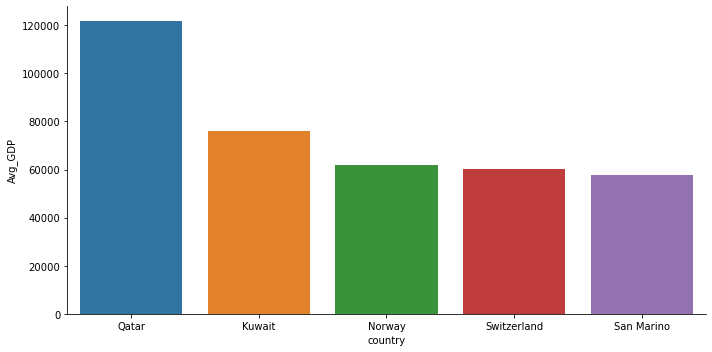

In [103]:
sns.catplot(x='country', y='Avg_GDP', data=df_top5_gdp_medal_count,kind='bar',aspect=2)

**Fig 2: Country vs Medal Count**

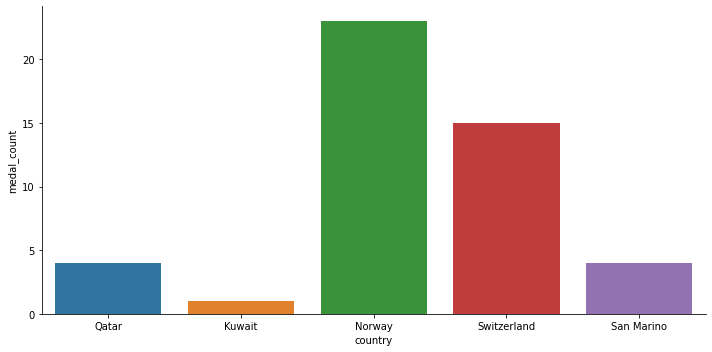

In [104]:
sns.catplot(x='country', y='medal_count', data=df_top5_gdp_medal_count,kind='bar',aspect=2)

### **Let's Delve Deeper**

#### *UPDATE: Through the above graph it shows that there is no predictiable correlation between the medals won and the GDP of the countries.*
### Since we dont know what is correlated with GDP, let's find out!*

#### *We wanted to further delve into what is correlated with the GDP, so we added another attribute population as per the suggestion of the Professor.*
#### *Adding this attribute contributed to the dataset because not only was the population important in understanding the country but also helps understand the partcipants in the Olympics. So maybe there is a correlation between GDP and partcipants?*

#### We uploaded a file from Kaggle that contains the population of each country

In [105]:
df_pop.head()

,Country(ordependency),Population(2020),YearlyChange,NetChange,Density(P/Km²),LandArea(Km²),Migrants(net),Fert.Rate,Med.Age,UrbanPop%,WorldShare
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


#### *End Result Dataframe for Analysis : A dataset with the GDP, medal_count, Population,athletes_count in one dataframe :*

**To do this we did the following steps below**

#### Merged GDP and Medal Count

In [106]:
df_aGDP_medalC = df_avg_gdp_country.merge(df_medal_count_by_country, left_on='country',right_on='country')

#### First groupby in the athletes table to get the number of athletes per country

In [107]:
df_a_count = df_a.groupby('country')[['country']].count().rename(columns={'country':'count'}).reset_index(level='country')

In [108]:
df_avgGdp_medal_aCount = df_aGDP_medalC.merge(df_a_count, left_on='country',right_on='country')\
                        .rename(columns={'count':'athlete_count'})

In [109]:
df_avgGdp_medal_aCount_pop =df_avgGdp_medal_aCount.merge(df_pop,left_on='country',right_on='Country(ordependency)')

**Dropped Unwanted Columns**

In [110]:
df_avgGdp_medal_aCount_pop.drop(columns=['Country(ordependency)','YearlyChange','NetChange','Density(P/Km²)',\
                                         'LandArea(Km²)','Migrants(net)','Fert.Rate','Med.Age',\
                                         'UrbanPop%','WorldShare'],inplace = True)

#### Final Dataframe

In [111]:
df_avgGdp_medal_aCount_pop.head()

,country,Avg_GDP,medal_count,athlete_count,Population(2020)
0,Qatar,121787.910,4.0,16,2889284
1,Kuwait,76174.215,1.0,10,4281320
2,Norway,61922.845,23.0,93,5428594
3,Switzerland,60360.051,15.0,116,8665615
4,San Marino,57730.670,4.0,5,33944


#### *This is the data frame we want to use to make the correlation with regards to the country population*

#### *Calculate Ratios*

**Add a Dummy Column to compute the ratio of athletes out of the entire country's population**

In [112]:
df_avgGdp_medal_aCount_pop['Country_participation'] = (df_avgGdp_medal_aCount_pop.athlete_count)/\
                                                        (df_avgGdp_medal_aCount_pop['Population(2020)'])

**Add a Dummy Column to compute the ratio of GDP per capita through the use of the country's population**

In [113]:
df_avgGdp_medal_aCount_pop['GDP_per_capita'] = (df_avgGdp_medal_aCount_pop.Avg_GDP)/\
                                                        (df_avgGdp_medal_aCount_pop['Population(2020)'])

**Finding the correlation for GDP**

In [114]:
df_avgGdp_medal_aCount_pop.corr()

,Avg_GDP,medal_count,athlete_count,Population(2020),Country_participation,GDP_per_capita
Avg_GDP,1.000000,0.244242,0.240129,-0.183628,0.260263,0.193892
medal_count,0.244242,1.000000,0.938694,0.073062,0.008757,-0.094077
athlete_count,0.240129,0.938694,1.000000,0.105564,-0.070970,-0.133594
Population(2020),-0.183628,0.073062,0.105564,1.000000,-0.153024,-0.054094
Country_participation,0.260263,0.008757,-0.070970,-0.153024,1.000000,0.870472
GDP_per_capita,0.193892,-0.094077,-0.133594,-0.054094,0.870472,1.000000


*This provides insight into what are the columns that are correlated to each other. Our target correlation is the Avg_GDP column. In this case the GDP is correlated with medal_count,athlete_count and country_partcipation. But the country_partcipation is higher in comparison to the medal_count and athlete_count.*

**Let's validate that with a Visualization in Seaborn**

#### Binned the Country_Partcipation into 3 bins that allow for better visualization

In [115]:
df_avgGdp_medal_aCount_pop['discretized_Country_participation_EF']=pd.qcut(df_avgGdp_medal_aCount_pop\
                                                                           .Country_participation, 3)

**Fig 3 - EF Binned Participants ratio vs Avg_GDP**

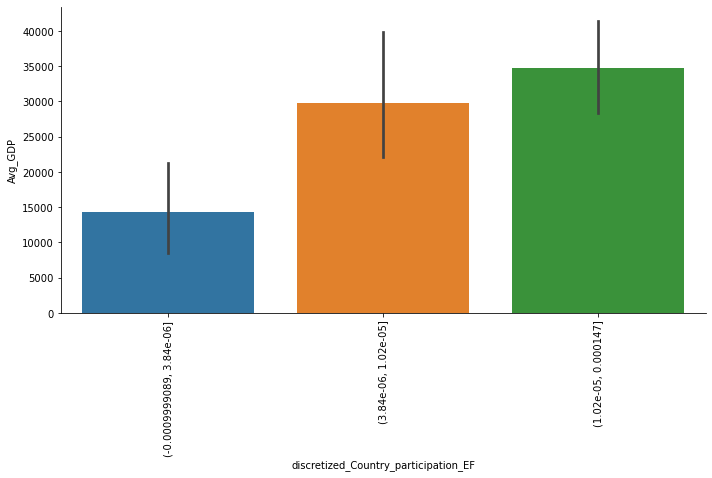

In [116]:
sns.catplot(x='discretized_Country_participation_EF', y = 'Avg_GDP', kind ='bar',\
            data=df_avgGdp_medal_aCount_pop, aspect =2).set_xticklabels(rotation=90)

This graph shows the same conclusion with the correlation above! 

**Conclusion from Graph Above**

The above graph demonstrates a correlation between the particpants and the avg GDP, the more participants the more the GDP. This is important finding because it demonstrates that there is a realtion between higher GDP giving more opportunity for the player to join for the games. The higher the GDP the higher the participation.


### **Managerial Insight 1**

**The managerial insight from the olympics perspective:**
- Is advocacy for countries with low GDP to increase/advocate for higher particpation. 
- Include more representation from countries with low GDP.
- Maybe think in terms of helping them fund their way into the Olympics.


**The insight I have for the countries with low GDP:** 
- Look for talent, and maybe think of giving them more focus.
- Give the athletes an opportunity through giving them a chance to train in other countries.
- Advocate for partcipation in the Sports help give opportunity for the people in your country. 

### Insight 2: How do the host countries perform in either their own countries versus others?

### To check this we'll look at how teams performed in the year that the Olympics were hosted in their native country vs one edition before and one edition later.

#### Let's check to see what we are working with

In [117]:
df_120.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal won
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal won
2,Gunnar Nielsen Aaby,M,24.0,Unknown,Unknown,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No medal won
3,Edgar Lindenau Aabye,M,34.0,Unknown,Unknown,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal won


#### From the Medal column change the No medal won = 0.0 , Gold = 1, Silver = 1 and Bronze = 1, this makes it binary

In [118]:
df_120['Medal'].replace({"No medal won": "0","Gold": "1","Silver": "1","Bronze":"1"},inplace=True)
df_120.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24.0,Unknown,Unknown,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,Edgar Lindenau Aabye,M,34.0,Unknown,Unknown,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


#### Locate the Team,Year and Medal Columns and do a groupby and count the number of medals by team & year

In [119]:
df_120_medal_tally = df_120.iloc[:,[5,8,13]]
df_120_medal_tally.head()

,Team,Year,Medal
0,China,1992,0
1,China,2012,0
2,Denmark,1920,0
3,Denmark/Sweden,1900,1
4,Netherlands,1988,0


In [120]:
df_team_medal= df_120_medal_tally.groupby(['Team','Year'], as_index=False)['Medal'].count()
df_team_medal.head()

,Team,Year,Medal
0,30. Februar,1952,2
1,A North American Team,1900,4
2,Acipactli,1964,3
3,Acturus,1948,2
4,Afghanistan,1936,16


#### Create a list for all the host countries, this results in a datafram that contains only the host countries/cities and the year they hosted

In [121]:
#host countries list
df_host=df_120[['Year','City']].drop_duplicates().sort_values('Year')
df_host['City'].unique()
df_latest_host = df_host.tail(10)
country_map = {'Nagano': 'Japan',
                  'Sydney': 'Australia',
                  'Salt Lake City': 'United States',
                  'Athina': 'Greece',
                  'Torino': 'Italy',
                  'Beijing': 'China',
                  'Vancouver': 'Canada',
                  'London': 'United Kingdom',
                  'Sochi': 'Russia',
                  'Rio de Janeiro': 'Brazil'}
df_latest_host['Country'] = df_latest_host['City'].map(country_map)
df_latest_host

,Year,City,Country
68,1998,Nagano,Japan
31,2000,Sydney,Australia
28,2002,Salt Lake City,United States
82,2004,Athina,Greece
77,2006,Torino,Italy
79,2008,Beijing,China
245,2010,Vancouver,Canada
1,2012,London,United Kingdom
40,2014,Sochi,Russia
80,2016,Rio de Janeiro,Brazil


#### Merge the Host country dataframe with the previous and following year information and their corresponding amount of medals they earned

In [122]:
df_latest_host1 = df_latest_host.merge(df_team_medal,
                                           left_on = ['Year', 'Country'],
                                           right_on = ['Year', 'Team'],
                                           how = 'left')
df_latest_host1.rename(columns = {'Medal' : 'Medal_Host_Olympics'}, inplace = True)
df_host=df_latest_host1.iloc[:,[2,4]]
df_latest_host1.head()

,Year,City,Country,Team,Medal_Host_Olympics
0,1998,Nagano,Japan,Japan,233.0
1,2000,Sydney,Australia,Australia,762.0
2,2002,Salt Lake City,United States,United States,285.0
3,2004,Athina,Greece,Greece,495.0
4,2006,Torino,Italy,Italy,266.0


**Now Add a Column for Previous Olympics Medals Earned by the Host Countries using Merge on the Countries**

In [123]:
df_latest_host['Prev_Year'] = df_latest_host['Year'] - 4
df_latest_host2 = df_latest_host.merge(df_team_medal,
                                                 left_on = ['Prev_Year', 'Country'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

df_latest_host2.rename(columns = {'Medal' : 'Medal_Prev_Olympics','Prev_Year':'Previous Olympic year'}\
                       , inplace = True)
df_prev_host=df_latest_host2.iloc[:,[6]]

**Now Add Column for Next Olympics Medals Earned by the Host Countries using Merge on the Countries**

In [124]:
df_latest_host['Next_Year'] = df_latest_host['Year'] + 4
df_latest_host3 = df_latest_host.merge(df_team_medal,
                                                 left_on = ['Next_Year', 'Country'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')
df_latest_host3.rename(columns = {'Medal' : 'Medal_Next_Olympics'}, inplace = True)
df_next_host=df_latest_host3.iloc[:,[7]]

**This results in the dataframe with Previous Olympics, Next Olympics and the Year they Hosted**

In [125]:
df_medal_compare = pd.concat([df_host, df_prev_host,df_next_host], axis=1)
df_result=df_medal_compare[0:7]
df_result

,Country,Medal_Host_Olympics,Medal_Prev_Olympics,Medal_Next_Olympics
0,Japan,233.0,121.0,199.0
1,Australia,762.0,542.0,585.0
2,United States,285.0,260.0,295.0
3,Greece,495.0,175.0,172.0
4,Italy,266.0,186.0,196.0
5,China,708.0,490.0,463.0
6,Canada,279.0,277.0,323.0


#### Conclusion from Data

Teams definetely have A home ground advantage.They performs better in their own country than in other countries when the Olympics are held. 

**Let's visualize to validate our findings**

**Fig 4: Country vs Amount of Medals**

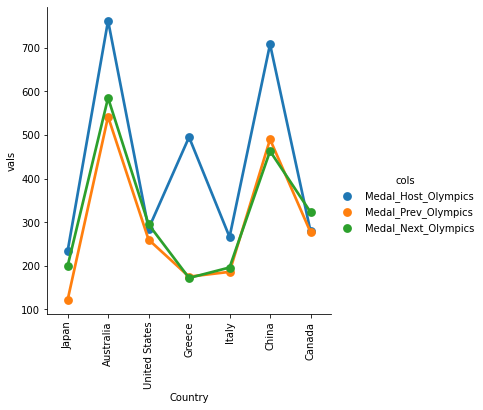

In [126]:
dfm = df_result.melt('Country', var_name='cols', value_name='vals')
sns.catplot(x="Country", y="vals", hue='cols', data=dfm, kind='point').set_xticklabels(rotation=90)

**The Conclusion from the Data and our Seaborn visual both demonstrate the same conlusion validating our analysis.**

### **Managerial Insight 2**

**From this Analysis we an understand the following trends**
- The Hosting country's athletes perform better on their home ground
- The Athletes that participate outside of the home country perform at a lower standard on average. 
    
**From this we can implement some managerial techniques to help mitigate this difference. This includes:** 
- Making athletes feel more welcome when leaving their home country 
- Providing resources such as Mental Health or Advising for those who leave their home country
- Provide down time for all athletes to recourperate and perform better.

### New - Insight 3A - Machine Learning: What are the vital attributes needed for Archery?

#### *After the presentation we took your feedback into consideration, as you mentioned in the presentation the female partcipation was not 'unexpected finding' so we changed it to this finding that was both interesting and unexpected*

Importing the clean dataset from a csv form

In [127]:
df120 = pd.read_csv("120_years_clean.csv")

**Drop Unecessary Columns**

In [128]:
df120.drop(columns=['Name', 'NOC', 'Games', 'City', 'Event', 'Season'], inplace=True)

#### Create a dataframe that contains details only about archers

In [129]:
df_archery = df120[df120.Sport == 'Archery']

In [130]:
df_archery.head()

,Sex,Age,Height,Weight,Team,Year,Sport,Medal
287,F,40.0,165.0,57.0,Morocco,2008,Archery,No medal won
659,F,35.0,Unknown,Unknown,Egypt,2008,Archery,No medal won
963,M,24.0,176.0,70.0,Russia,2008,Archery,No medal won
964,M,24.0,176.0,70.0,Russia,2008,Archery,No medal won
1054,F,25.0,160.0,57.0,Iran,2008,Archery,No medal won


#### Drop unnecessary columns

In [131]:
df_archery.drop(columns=['Sport'], inplace=True)

#### Percentage of 'Unknowns' in age column

In [132]:
(((df_archery.Age == 'Unknown').sum())/(df_archery.Age.size))*100

3.4275921165381322

#### Percentage of 'Unknowns' in height column

In [133]:
(((df_archery.Height == 'Unknown').sum())/(df_archery.Height.size))*100

16.666666666666664

#### Percentage of 'Unknowns' in weight column

In [134]:
(((df_archery.Weight == 'Unknown').sum())/(df_archery.Weight.size))*100

19.194515852613538

#### Convert all the columns to numerical or binary values

In [135]:
df_archery.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Team', 'Year', 'Medal'], dtype='object')

In [136]:
df_archery.head(1)

,Sex,Age,Height,Weight,Team,Year,Medal
287,F,40.0,165.0,57.0,Morocco,2008,No medal won


In [137]:
df_archery['Sex'] = df_archery.Sex.apply(lambda x : 1.0 if (x is'M') else 0.0)

In [138]:
df_archery.loc[(df_archery.Medal=='Gold'), 'Medal'] = 1
df_archery.loc[(df_archery.Medal=='Silver'), 'Medal'] = 1
df_archery.loc[(df_archery.Medal=='Bronze'), 'Medal'] = 1
df_archery.loc[(df_archery.Medal=='No medal won'), 'Medal'] = 0

#### Replace 'Unknown' values in Height, Weight and Age columns with the median height of the country the athlete belongs to.

#### Create a list of countries that has 'Unknown' values 

In [139]:
countries = list(df_archery[(df_archery.Height=='Unknown')|\
                         (df_archery.Weight=='Unknown')|\
                         (df_archery.Age=='Unknown')].Team.unique())

#### Calculate median height, weight and age for each country and add it to the respective dictionaries.

In [140]:
avg_height = dict()
avg_weight = dict()
avg_age = dict()
for country in countries:
    if ((df_archery.Height != 'Unknown').sum() != 0):
        avg_height[country] = df_archery[(df_archery.Team == country) &\
                                         (df_archery.Height != 'Unknown')].Height.median()
    if ((df_archery.Weight != 'Unknown').sum()!= 0):
        avg_weight[country] = df_archery[(df_archery.Team == country) &\
                                         (df_archery.Weight != 'Unknown')].Weight.median()
    if ((df_archery.Age != 'Unknown').sum() != 0):
        avg_age[country] = df_archery[(df_archery.Team == country) &\
                                      (df_archery.Age != 'Unknown')].Age.median()

#### Replace the 'Unknown' values with the median height of the respective countrie the athlete belongs to

In [141]:
for country in countries:
    df_archery.loc[((df_archery.Height=='Unknown') &\
                    (df_archery.Team == country)), 'Height'] = avg_height[country]
    df_archery.loc[((df_archery.Weight=='Unknown') &\
                    (df_archery.Team == country)), 'Weight'] = avg_weight[country]
    df_archery.loc[((df_archery.Age=='Unknown') &\
                    (df_archery.Team == country)), 'Age'] = avg_age[country]

#### Some of the values are NaNs because there are countries in which all the athlete's heights and weights are unknown. 

In [142]:
df_archery.Height.isna().sum()

17

In [143]:
df_archery.Weight.isna().sum()

23

In [144]:
df_archery.Age.isna().sum()

0

#### Fill the NaNs

In [145]:
df_archery.Height.ffill(inplace=True)
df_archery.Weight.ffill(inplace=True)

#### Create dummies for the 'Team' column

In [146]:
df_archery_dt = pd.get_dummies(df_archery, columns = ['Team'])

In [147]:
df_archery_dt.head(1)

,Sex,Age,Height,Weight,Year,Medal,Team_American Samoa,Team_Argentina,Team_Australia,Team_Austria,...,Team_Turkey,Team_Uganda,Team_Ukraine,Team_Unified Team,Team_United States,Team_Vanuatu,Team_Venezuela,Team_West Germany,Team_Yugoslavia,Team_Zimbabwe
287,0.0,40.0,165.0,57.0,2008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Classification

#### Assign X and Y

In [148]:
Y = df_archery_dt.Medal
X = df_archery_dt.drop(['Medal', 'Year'],axis=1)

In [149]:
Y.unique()

array([0, 1], dtype=object)

#### Convert object to int type

In [150]:
Y=Y.astype('int')

In [151]:
Y.unique()

array([0, 1])

#### Build the tree

In [152]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [153]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

In [154]:
dt_feature_names = list(X.columns)
dt_feature_names[:10]

['Sex',
 'Age',
 'Height',
 'Weight',
 'Team_American Samoa',
 'Team_Argentina',
 'Team_Australia',
 'Team_Austria',
 'Team_Azerbaijan',
 'Team_Bangladesh']

In [155]:
dt_target_names = [str(s) for s in Y.unique()]
dt_target_names

['0', '1']

#### **Fig 5: Decision Tree**

#### Visualize Decision Tree

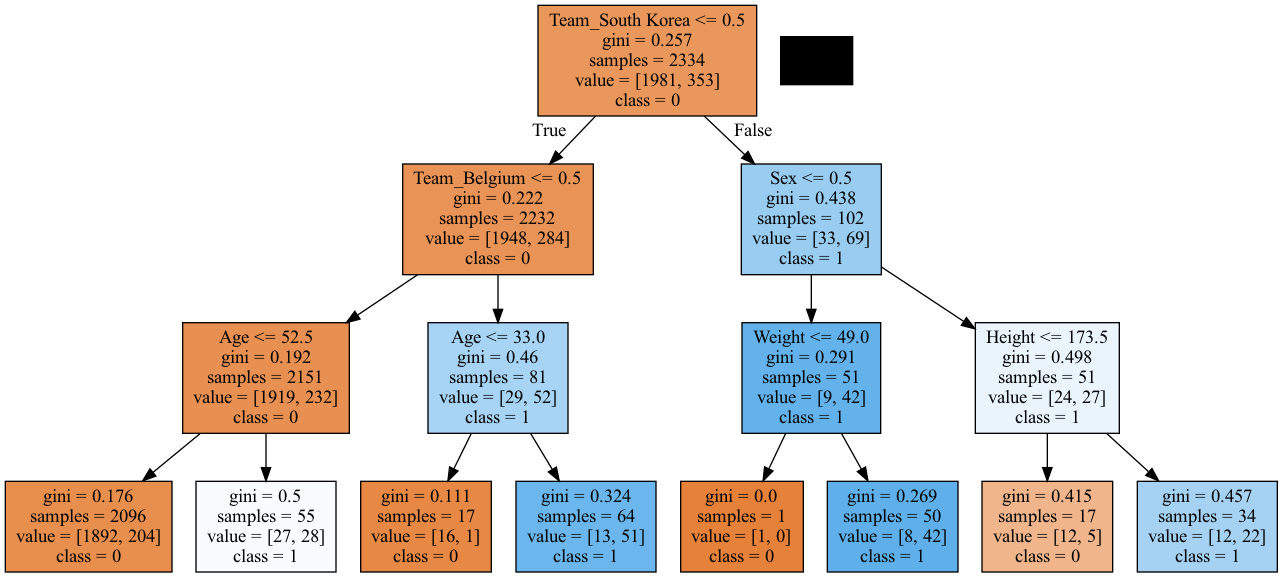

In [156]:
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In South Korea, in the discipline of archery, women outperform men

### Validation:

#### Create a dataframe that has only South Korean athletes' information who participated in Archery

In [157]:
df_s_korea = df_archery[(df_archery.Team == 'South Korea')]

In [158]:
df_s_korea.loc[(df_s_korea.Sex == 1), 'Sex'] = 'Male'
df_s_korea.loc[(df_s_korea.Sex == 0), 'Sex'] = 'Female'

In [159]:
df_s_korea.head(1)

,Sex,Age,Height,Weight,Team,Year,Medal
38429,Female,29.0,158.0,50.0,South Korea,2016,1


#### Fig 6: Female and Male Partcipants from South Korea in Sport Archery

#### Total male and female archers from South Korea who participated in the Olympics

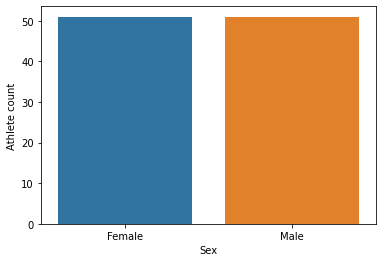

In [160]:
ax = sns.countplot(df_s_korea.Sex)
ax.set(xlabel='Sex', ylabel='Athlete count')
plt.show()

#### Create a dataframe that has only South Korean athletes' information who won medals in Archery

In [161]:
df_s_korea_med = df_s_korea[df_archery.Medal==1]

#### Fig 7: Male and Female Medal Count in Sport Archery from Country South Korea

#### Total male and female archers from South Korea who won medals in the Olympics

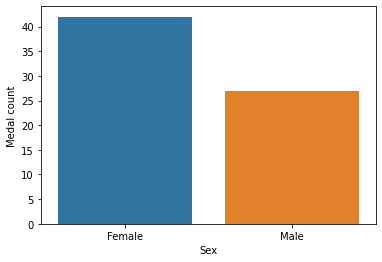

In [162]:
ax = sns.countplot(df_s_korea_med.Sex)
ax.set(xlabel='Sex', ylabel='Medal count')
plt.show()

#### Percentage of women archers from South Korea who won medals

In [163]:
((df_s_korea_med.Sex == 'Female').sum()/(df_s_korea.Sex == 'Female').sum())*100

82.35294117647058

#### Percentage of male archers from South Korea who won medals

In [164]:
((df_s_korea_med.Sex == 'Male').sum()/(df_s_korea.Sex == 'Male').sum())*100

52.94117647058824

#### Female outperformace percentage

In [165]:
f = ((df_s_korea_med.Sex == 'Female').sum() / len(df_s_korea_med))*100

In [166]:
m = ((df_s_korea_med.Sex == 'Male').sum() / len(df_s_korea_med))*100

In [167]:
((f-m)/m)*100

55.55555555555558

#### Conclusion:

In South Korea, in the discipline of archery, women outperform men by 55.56%.
82.35% of the women archers who participated won a medal while only 52.94% of the men archers won a medal. 

Total female archers = 51
Total number of medals won by women = 42

Total male archers = 51
Total number of medals won by men = 27

Moreover, a South Korean female archer with height greater than 157.5cm is more likely to win a medal in Olympics. A South Korean male archer taller than 173.5 cm is more likely to win a medal.

#### Managerial insights:

It is interesting to note that the women archers outperformed men in South Korea because women has always been underrepresented in the 120 years of Olympics history. But when given equal opportunity women can excel as good as men if not better. The South Korean archers proved this in the Olympics.

**From the South Koren Country Perspective, it is important to consider the following:**
- When recruiting for women partcipants in the sport of archery there is a trend of having a height of greater than or equal to 157.5cm tends to win medals, using this the country can recruit more women in this height range to potenially win more medals.
- When thinking about women out performing men, maybe South Korean men need a new approach to training in Archery
- recruit men with the typical height of 173.5cm or greater for a higher chance of winning a medal.



### Old - Insight 3B: Machine Learning : Predict the female representation in the 2022 Winter Olympics

In [168]:
df_a.head(1)

,name,gender,birth_date,country,discipline,height_m_ft,Age,height_feet
0,AALERUD Katrine,Female,12/4/1994,Norway,Cycling Road,Unknown,26.0,Unknown


#### Drop unnecessary columns in the athlete csv file

In [169]:
df_a.drop(columns = ['birth_date', 'country', 'discipline', 'height_m_ft', 'Age', 'height_feet'], inplace = True)

In [170]:
df_a.head(1)

,name,gender
0,AALERUD Katrine,Female


In [171]:
df_120.head(1)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0


#### Merge 120 years dataset with Tokyo2021-athletes dataset

In [172]:
df_120 = df_120.merge(df_a, left_on = 'Name', right_on = 'name', how = 'outer')

 #### Check for NaNs

In [173]:
df_120.Name.isna().sum()

11656

In [174]:
df_120.Sex.isna().sum()

11656

#### Fill NaNs

In [175]:
df_120.loc[(df_120.Name.isna()), 'Name'] = df_120.name

In [176]:
df_120.loc[(df_120.Sex.isna()), 'Sex'] = df_120.gender

In [177]:
df_120.loc[(df_120.Year.isna()), 'Year'] = 2020.0

In [178]:
df_120.loc[(df_120.Season.isna()), 'Season'] = 'Summer'

#### Follow uniform values

In [179]:
df_120.loc[(df_120.Sex == 'Female'), 'Sex'] = 'F'

In [180]:
df_120.loc[(df_120.Sex == 'Male'), 'Sex'] = 'M'

 #### Drop unnecessary columns

In [181]:
df_120.drop(columns = ['Name', 'NOC', 'Games', 'Team', 'Event', 'City', 'Height',\
                    'Weight', 'Age', 'Medal', 'name','gender', 'Sport'],axis=1,inplace=True)

In [182]:
df_120.head()

,Sex,Year,Season
0,M,1992.0,Summer
1,M,2012.0,Summer
2,M,1920.0,Summer
3,M,1900.0,Summer
4,F,1988.0,Winter


#### Groupby to get the total number of male and female athletes who participated in each Olympics

In [183]:
athlete_count = df_120.groupby(['Year', 'Season', 'Sex'], as_index = False).size()\
                .rename(columns= {'size':'N_athletes'})
athlete_count.tail()

,Year,Season,Sex,N_athletes
99,2016.0,Summer,F,6223
100,2016.0,Summer,M,7465
101,2020.0,Summer,F,5495
102,2020.0,Summer,M,6002
103,2020.0,Summer,Unknown,159


#### Remove the unknown row

In [184]:
athlete_count = athlete_count[athlete_count.Sex != 'Unknown']

#### Add the 2018 winter olympics data into the athlete_count.
##### Source: Wikipedia

In [185]:
athlete_count = athlete_count.append({'Year': 2018.0, 'Season': 'Winter', 'Sex':'F', 'N_athletes': 1242},\
                                     ignore_index = True)

In [186]:
athlete_count = athlete_count.append({'Year': 2018.0, 'Season': 'Winter', 'Sex':'M', 'N_athletes': 1680},\
                                     ignore_index = True)

#### Sort values based on Year

In [187]:
athlete_count.sort_values(by='Year', inplace=True)

In [188]:
athlete_count.tail()

,Year,Season,Sex,N_athletes
100,2016.0,Summer,M,7465
103,2018.0,Winter,F,1242
104,2018.0,Winter,M,1680
101,2020.0,Summer,F,5495
102,2020.0,Summer,M,6002


In [189]:
len(athlete_count)

105

#### Male and female count over the years in Summer Olympics

In [190]:
athlete_count_s = athlete_count[athlete_count.Season == 'Summer']

#### Fig 8 : Number of Athletes by Year in both Females and Males in Summer Olympics

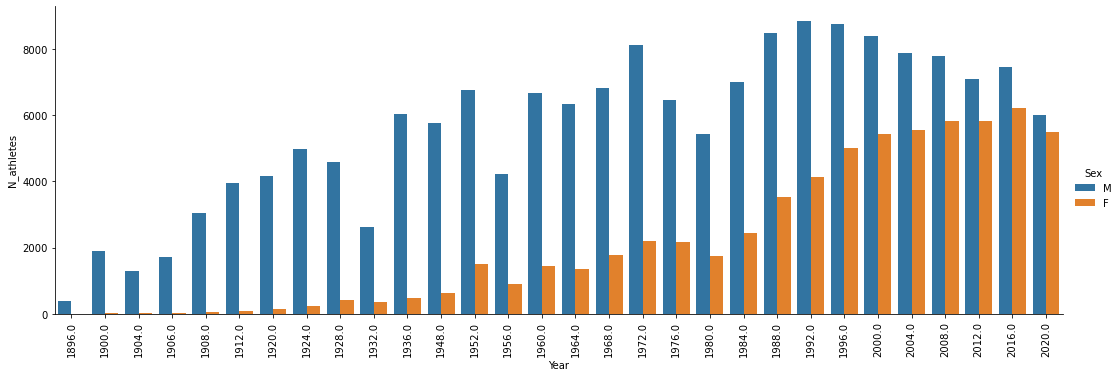

In [191]:
sns.catplot(x='Year', y = 'N_athletes', hue = 'Sex', kind = 'bar',\
            data = athlete_count_s, aspect = 3).set_xticklabels(rotation=90)
                    

#### Male and female count over the years in Winter Olympics

In [192]:
athlete_count_w = athlete_count[athlete_count.Season == 'Winter']

#### Fig 9 : Number of Athletes by Year for both Female and Male in Winter Olympics

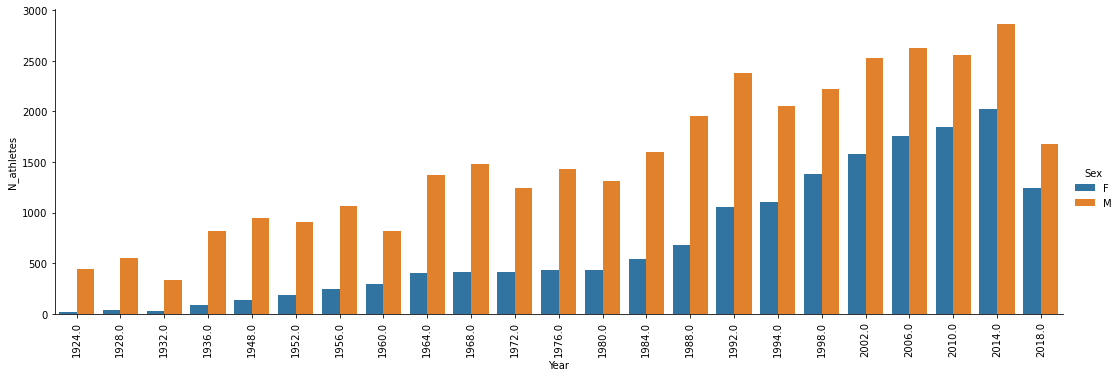

In [193]:
sns.catplot(x='Year', y = 'N_athletes', hue = 'Sex', kind = 'bar',\
            data = athlete_count_w, aspect = 3).set_xticklabels(rotation=90)
                    

#### Separate male and female data and merge as a single row for each Olympics

*Female dataframe*

In [194]:
female_df = athlete_count[athlete_count.Sex == 'F']
female_df.rename(columns = {'N_athletes':'Female'}, inplace = True)
female_df.drop(columns = 'Sex', inplace = True)
female_df.shape

(52, 3)

*Male dataframe*

In [195]:
male_df = athlete_count[athlete_count.Sex == 'M']
male_df.rename(columns = {'N_athletes':'Male'}, inplace=True)
male_df.drop(columns='Sex', inplace=True)
male_df.shape

(53, 3)

#### Merge male and female dataframes

In [196]:
athlete_count_df = male_df.merge(female_df, left_on=['Year', 'Season'],\
                                 right_on = ['Year', 'Season'], how = 'outer')

In [197]:
athlete_count_df.isna().any()

Year      False
Season    False
Male      False
Female     True
dtype: bool

In [198]:
athlete_count_df.fillna(value=0, inplace=True)
len(athlete_count_df)

53

In [199]:
athlete_count_df.head(1)

,Year,Season,Male,Female
0,1896.0,Summer,380,0.0


#### Calculate gender percentage and ratio gap

In [200]:
athlete_count_df['female_percent'] = (athlete_count_df.Female/\
                                      (athlete_count_df.Male + athlete_count_df.Female))*100

In [201]:
athlete_count_df['male_percent'] = (athlete_count_df.Male/\
                                    (athlete_count_df.Male + athlete_count_df.Female))*100

In [202]:
athlete_count_df['ratio_gap'] = athlete_count_df.male_percent - athlete_count_df.female_percent

In [203]:
athlete_count_df.tail()

,Year,Season,Male,Female,female_percent,male_percent,ratio_gap
48,2012.0,Summer,7105,5815.0,45.007740,54.992260,9.984520
49,2014.0,Winter,2868,2023.0,41.361685,58.638315,17.276631
50,2016.0,Summer,7465,6223.0,45.463179,54.536821,9.073641
51,2018.0,Winter,1680,1242.0,42.505133,57.494867,14.989733
52,2020.0,Summer,6002,5495.0,47.795077,52.204923,4.409846


#### Fig 10: Female representation over the years

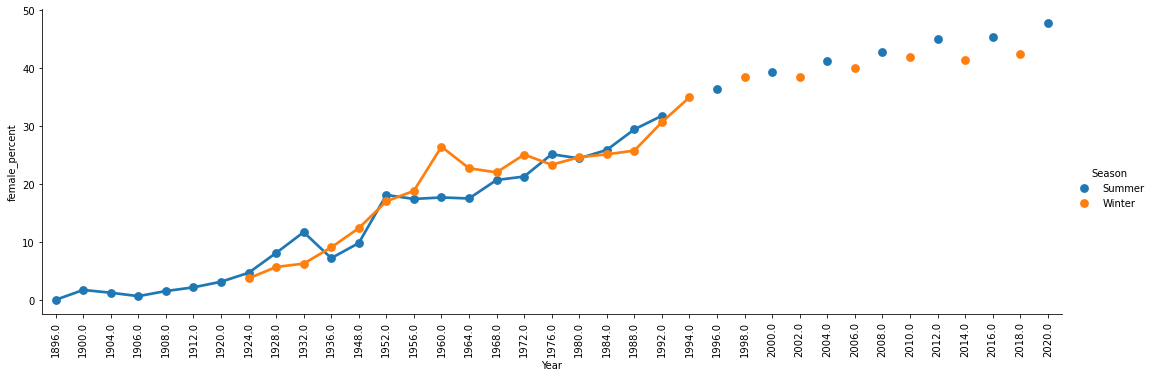

In [204]:
sns.catplot(x='Year', y='female_percent',hue='Season', kind = 'point',\
            data = athlete_count_df, aspect = 3).set_xticklabels(rotation=90)

#### Fig 11 : Ratio gap over the years

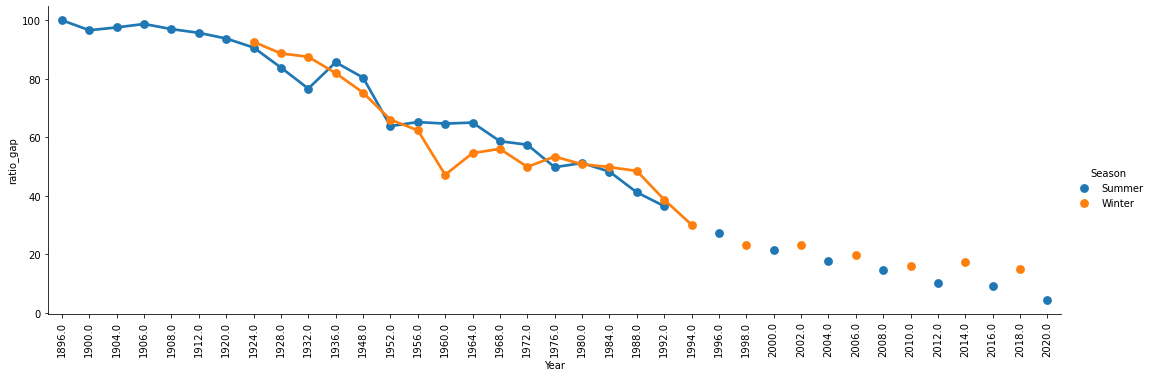

In [205]:
sns.catplot(x='Year', y='ratio_gap', hue='Season', kind = 'point',\
            data = athlete_count_df, aspect = 3).set_xticklabels(rotation=90)

#### Shift by 1 to get the value of the previous year

In [206]:
pre_year_count = athlete_count_df.shift(1)

#### Find moving average for every 5 years to normalise the winter female percentage dip

In [207]:
pre_5_years_count = pre_year_count.rolling(5).mean()

#### Calculate the female percent increase and average ratio gap for every 5 years

In [208]:
athlete_count_df['female_per_increase'] = athlete_count_df.female_percent - pre_5_years_count.female_percent

In [209]:
athlete_count_df['pre_5_yrs_ratio_gap_avg'] = pre_5_years_count.ratio_gap

In [210]:
athlete_count_df.tail(1)

,Year,Season,Male,Female,female_percent,male_percent,ratio_gap,female_per_increase,pre_5_yrs_ratio_gap_avg
52,2020.0,Summer,6002,5495.0,47.795077,52.204923,4.409846,4.535889,13.481625


#### Fill NaNs

In [211]:
athlete_count_df.female_per_increase.isna().sum()

5

In [212]:
athlete_count_df.female_per_increase.replace(to_replace=np.nan, value=0, inplace=True)

In [213]:
athlete_count_df.pre_5_yrs_ratio_gap_avg.replace(to_replace=np.nan, value=100, inplace=True)

In [214]:
athlete_count_df.isna().any()

Year                       False
Season                     False
Male                       False
Female                     False
female_percent             False
male_percent               False
ratio_gap                  False
female_per_increase        False
pre_5_yrs_ratio_gap_avg    False
dtype: bool

In [215]:
athlete_count_df.head()

,Year,Season,Male,Female,female_percent,male_percent,ratio_gap,female_per_increase,pre_5_yrs_ratio_gap_avg
0,1896.0,Summer,380,0.0,0.000000,100.000000,100.000000,0.0,100.0
1,1900.0,Summer,1903,33.0,1.704545,98.295455,96.590909,0.0,100.0
2,1904.0,Summer,1285,16.0,1.229823,98.770177,97.540354,0.0,100.0
3,1906.0,Summer,1722,11.0,0.634737,99.365263,98.730525,0.0,100.0
4,1908.0,Summer,3054,47.0,1.515640,98.484360,96.968720,0.0,100.0


#### Fig 12  : Moving average of female percent increase over the years

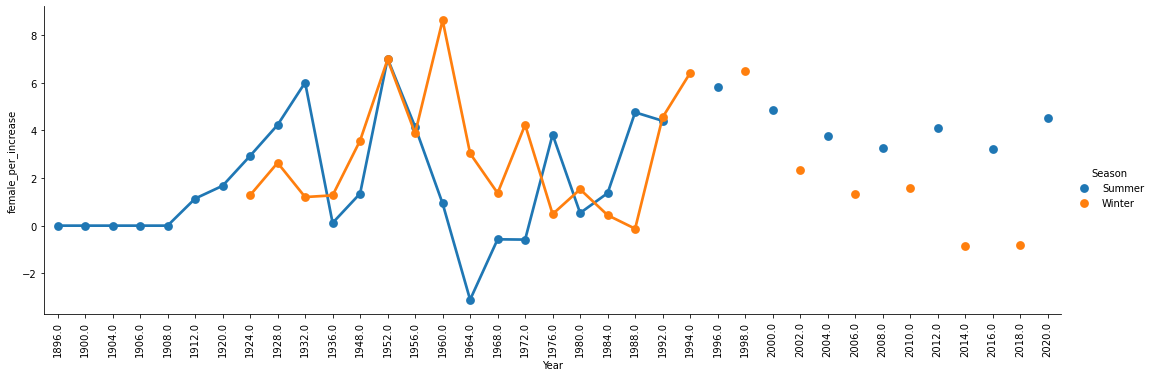

In [216]:
sns.catplot(x='Year', y='female_per_increase',hue='Season', kind = 'point',\
            data = athlete_count_df, aspect = 3).set_xticklabels(rotation=90)

#### Fig 13 : Normalized : Moving average of ratio gap over the years

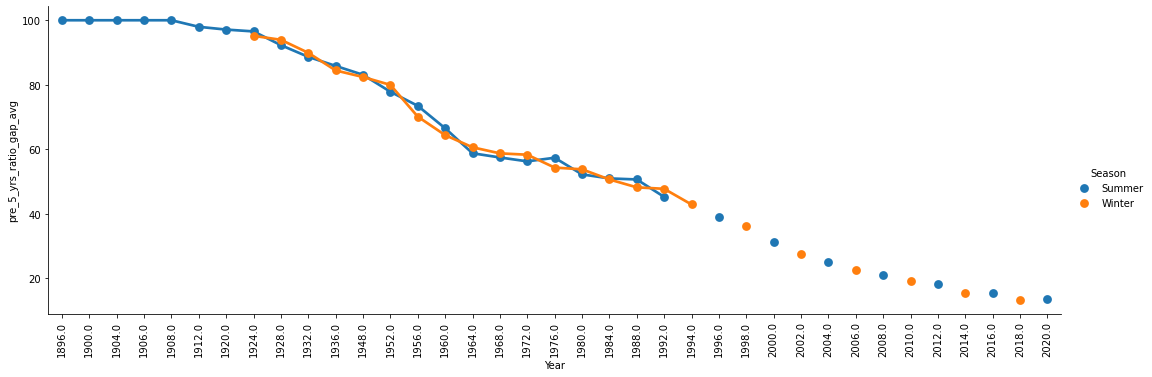

In [217]:
sns.catplot(x='Year', y='pre_5_yrs_ratio_gap_avg', hue='Season', kind = 'point',\
            data = athlete_count_df, aspect = 3).set_xticklabels(rotation=90)

#### Average female percent increase

In [218]:
avg_female_per_increase = athlete_count_df.female_per_increase.mean()
avg_female_per_increase

2.475097567967837

### Classification Decision Tree

#### Question: Will the female percentage increase in the 2022 winter olympics?

#### Convert all the columns to numerical values or binary

In [219]:
athlete_count_df['female_per_inc_binary'] = (athlete_count_df.female_per_increase > 0) + 0.0

In [220]:
df = athlete_count_df

#### Assign X and Y

In [221]:
Y = df.female_per_inc_binary
X = df.drop(['female_per_inc_binary',\
             'female_per_increase', 'Male',\
             'female_percent', 'male_percent', 'Female', 'ratio_gap', 'Season'],axis=1)
X.tail(1)

,Year,pre_5_yrs_ratio_gap_avg
52,2020.0,13.481625


In [222]:
Y.unique()

array([0., 1.])

#### Build the tree

In [223]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [224]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

In [225]:
dt_feature_names = list(X.columns)
dt_feature_names

['Year', 'pre_5_yrs_ratio_gap_avg']

In [226]:
dt_target_names = [str(s) for s in Y.unique()]
dt_target_names

['0.0', '1.0']

#### Fig 14: Visualize the tree

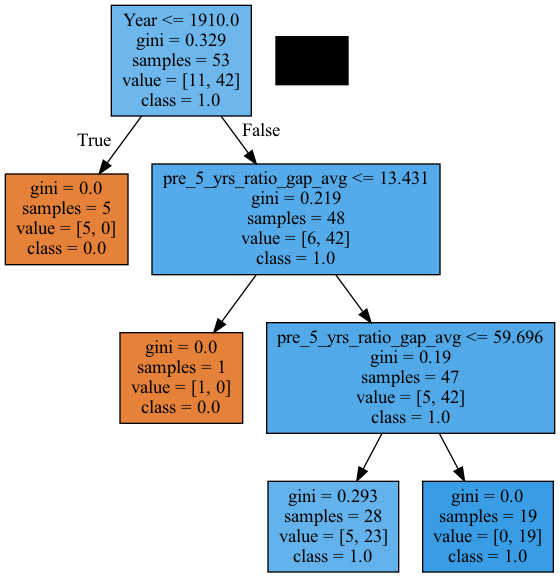

In [227]:
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### The ratio_gap in 2020 is 11.15%

#### We can predict the female percentage change in the 2022 Winter Olympics using the the above value.

In [228]:
df.ratio_gap.tail(5).mean()

11.146874184322332

In [229]:
df.female_percent.values[-1]

47.79507697660259

### The female representation in the 2022 Winter Olympics will not increase more than 47.80% 

### Regression

#### Question: What will be the percentage change in female representation in the 2022 Winter Olympics?

#### Assign X and Y

In [230]:
Y = df.female_per_increase
X = df.drop(['female_per_inc_binary',\
             'female_per_increase', 'Male',\
             'female_percent', 'male_percent', 'Female', 'ratio_gap', 'Season'],axis=1)

In [231]:
X.tail(1)

,Year,pre_5_yrs_ratio_gap_avg
52,2020.0,13.481625


In [232]:
Y.nunique()

49

#### Build the tree

In [233]:
dt = sk.tree.DecisionTreeRegressor(max_depth = 2)
dt.fit(X,Y)

DecisionTreeRegressor(max_depth=2)

In [234]:
dt_feature_names = list(X.columns)
dt_feature_names 

['Year', 'pre_5_yrs_ratio_gap_avg']

In [235]:
dt_target_names = np.array(Y.unique(),dtype=np.string_)
dt_target_names[:5]

array([b'0.0', b'1.1365160999227126', b'1.6744452889273544',
       b'2.93156662455413', b'1.2779225964100163'], dtype='|S32')

#### Fig 15 : Visualize Regression

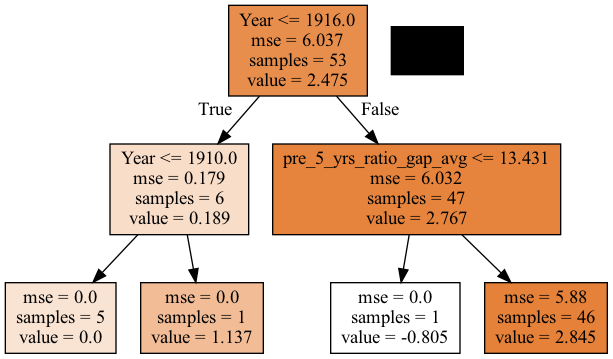

In [236]:
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### The ratio_gap in 2020 is 11.15%

#### We can predict the female percentage change in the 2022 Winter Olympics using the the above value.

In [237]:
df.ratio_gap.tail(5).mean()

11.146874184322332

#### Female representation in 2020 Summer Olympics (Tokyo) is 47.80%

In [238]:
df.female_percent.values[-1]

47.79507697660259

#### Conclusion from Machine Learning 3B:

The female representation in the 2022 Winter Olympics will go down by 0.805%. 

Female representation will be around 46.995%

According to the regression decision tree, 2022 Olympics might have a female representation of around 46.995%. The classification decision tree confirms this by showing that the female representation will not go above 47.80%.

### Managerial Insights 3B: 

**From the olympic point of view it is evident that the female representation has been growing at a slower rate in Winter Olympics when compared to Summer the Olympics. To mitigate this effect the Olympics committe could do the following:**
- They can outreach/ adovcate for more female participants to join for the Winter Olympics.
- Invite for young children who are female to watch the Olympics live maybe thorugh a Raffle system. 
- Help bring attention to the gender diaprity in the Winter Olympics.

**From the Country's perspective they can help improve the female partcipation via:**
- Advocating for more females to partcipate in the winter olympics sports
- increase resources to funding more women in the winter sports
- creating programs to help adovcate/ train children to learn winter sports to help increase the chance for female partcipants to go the winter olympics.